
# BMIS-2542: Data Programming Essentials with Python 
##### Katz Graduate School of Business, Spring 2021

## Session-10: Logistic Regression


### Logistic Regression

Logistic regression extends the ideas of linear regression to the situation where the outcome variable $Y$ is categorical. In this notebook, we focus on the use of logistic regression for classification, where a new record of which the class (i.e., outcome) is unknown can be classified into one of the classes, based on the values of its predictor variables. While binary outcomes such as success/failure, yes/no, buy/don't buy, survive/die, etc., are quite popular, logistic regression models can be extended to multi-class classification problems as well.

In logistic regression, instead of using $Y$ directly as the outcome variable, a function of it, which is called the `logit`  is used . The `logit` can be modeled as a linear function of the predictors.

If $p = P(Y=1)$, then we can define $$p = \frac{1}{1+e^{-(\beta_0 + \beta_1x_1+\beta_2x_2+....+ \beta_qx_q)}}$$ <br>so that for any $x_1......x_q$, the right hand side will always lead to values in the interval $[0,1]$.

Given $$Odds(Y=1) = \frac{p}{1-p}$$ <br>the relationship between odds and the predectors would be <br>$$Odds(Y=1) = e^{\beta_0 + \beta_1x_1+\beta_2x_2+....+ \beta_qx_q}$$<br>

By taking a natural logarithm of both sides, the standard formulation of a logistic model can be obtained:<br> $$log(odds) = \beta_0 + \beta_1x_1+\beta_2x_2+....+ \beta_qx_q$$

<br>

**Read more about [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) on scikit-learn. Implementation details are [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).**

 ### Example: Acceptance of a Personal Loan
In this example, we analyze `bank.csv`, that includes data related to the acceptance of a personal loan by a bank. The variable descriptions are given below. The goal is to build a model that identifies customers who are most likely to accept a loan offer in the future.

   - ID   		 - Customer ID
   - Age   		 - Customer's age in completed years
   - Experience   	- #years of professional experience
   - Income   		 - Annual income of the customer ('000)
   - ZIPCode   		 - Home Address ZIP code.
   - Family   		 - Family size of the customer
   - CCAvg   		  -Avg. spending on credit cards per month ('000)
   - Education   	 	 - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
   - Mortgage   	 	 - Value of house mortgage if any. ('000)
   - **Personal Loan**   	 - Did this customer accept the personal loan offered in the last campaign?
   - Securities Account   - Does the customer have a securities account with the bank?
   - CD Account   	 - Does the customer have a certificate of deposit (CD) account with the bank?
   - Online   		 - Does the customer use internet banking facilities?
   - CreditCard   	 - Does the customer use a credit card issued by UniversalBank?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pylab as plt
%matplotlib inline 

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, roc_auc_score, classification_report, precision_score, accuracy_score, recall_score, f1_score

In [2]:
df_loans = pd.read_csv('bank.csv')
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [3]:
df_loans.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df_loans.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [4]:
# rename the column names replacing spaces with '_'
df_loans.columns = [column.replace(' ', '_').lower() for column in df_loans.columns]

In [5]:
df_loans.columns

Index(['id', 'age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'creditcard'],
      dtype='object')

In [6]:
# drop the ID and ZIP Code columns as they are not required for the analysis
df_loans.drop(columns=['id', 'zip_code'], inplace=True)

In [7]:
# examine the education variable
df_loans.education.unique()

array([1, 2, 3], dtype=int64)

In [8]:
# convert education to a categorical variable
df_loans['education'] = df_loans['education'].astype('category') 

# define the new categories
new_categories = {1: 'undergrad', 2: 'graduate', 3: 'advanced/professional'}
df_loans.education.cat.rename_categories(new_categories, inplace=True)

In [9]:
df_loans.education.unique()

['undergrad', 'graduate', 'advanced/professional']
Categories (3, object): ['undergrad', 'graduate', 'advanced/professional']

In [10]:
df_loans = pd.get_dummies(df_loans, prefix_sep='_', drop_first=True)

In [11]:
df_loans.head()

,age,experience,income,family,ccavg,mortgage,personal_loan,securities_account,cd_account,online,creditcard,education_graduate,education_advanced/professional
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0


In [12]:
Y = df_loans['personal_loan']
X = df_loans.drop(columns=['personal_loan'])

In [13]:
# partition data
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.25, random_state=42)

#### Regularization

Regularization (i.e., shrinkage) techniques are used to constrain the magnitude of the coefficients by imposing a penalty on the model-fit. This improves the stability and the predictive power of the model. There are two common types of regularization methods: L1 and L2. 

- L1 regularization adds an L1 penalty equal to the absolute value of the magnitude of coefficients. This drives the values of certain coefficients towards 0, **eliminating the least important features in the model**. L1 regularization can yield sparse models. This is helpful when dealing with a large number of predictors in the model.

- L2 regularization adds an L2 penalty equal to the square of the magnitude of coefficients. L2 will not yield sparse models and all coefficients are shrunk by the same factor.

In [14]:
# fit a logistic regression model. C=1e42 is selected to avoid regularization.
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X_train, Y_train)

LogisticRegression(C=1e+42, solver='liblinear')

In [15]:
print('intercept ', logit_reg.intercept_[0])
pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns)

intercept  -12.093161482593368


,coeff
age,-0.030373
experience,0.040867
income,0.057935
family,0.639442
ccavg,0.147727
mortgage,0.001151
securities_account,-0.948314
cd_account,3.777481
online,-0.705371
creditcard,-1.126106


In [16]:
Y_valid_predicted = logit_reg.predict(X_valid) # predicting Y on the validation set
Y_valid_pred_prob = logit_reg.predict_proba(X_valid) # get the predicted probabilties for each class

# display in a DataFrame
logit_result = pd.DataFrame({'actual_class': Y_valid, 
                             'P(Y=0)': [p[0] for p in Y_valid_pred_prob],
                             'P(Y=1)': [p[1] for p in Y_valid_pred_prob],
                             'predicted_class': Y_valid_predicted})

logit_result[logit_result.predicted_class == 1].head()

,actual_class,P(Y=0),P(Y=1),predicted_class
1084,1,0.003013,0.996987,1
4842,1,0.011557,0.988443,1
29,1,0.272148,0.727852,1
4628,1,0.323326,0.676674,1
2215,1,0.019900,0.980100,1


In [17]:
logit_result[logit_result.predicted_class == 0].head()

,actual_class,P(Y=0),P(Y=1),predicted_class
1501,0,0.999603,0.000397,0
2586,1,0.834185,0.165815,0
2653,0,0.986463,0.013537,0
1055,0,0.999957,0.000043,0
705,0,0.996725,0.003275,0


In [18]:
conf_matrix = confusion_matrix(Y_valid, Y_valid_predicted)
print('************Logistic Regression************')
print("Validation Set Classification accuracy:", logit_reg.score(X_valid,Y_valid))
print("\n")
print ("Validation Set Confusion matrix: \n" + str(conf_matrix))
print("\n")
print("Validation Set Classification Report:\n",classification_report(Y_valid, Y_valid_predicted))

************Logistic Regression************
Validation Set Classification accuracy: 0.9624


Validation Set Confusion matrix: 
[[1106   10]
 [  37   97]]


Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1116
           1       0.91      0.72      0.80       134

    accuracy                           0.96      1250
   macro avg       0.94      0.86      0.89      1250
weighted avg       0.96      0.96      0.96      1250



[[1106   10]
 [  37   97]]


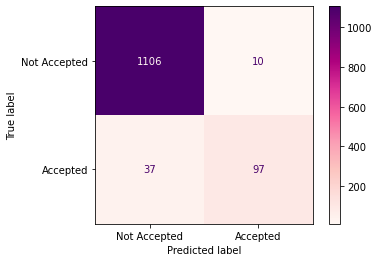

In [19]:
disp = plot_confusion_matrix(logit_reg, X_valid, Y_valid,
                                 display_labels=['Not Accepted', 'Accepted'],
                                 cmap=plt.cm.RdPu,
                                 normalize=None)
print(disp.confusion_matrix)

Area under the ROC: 0.971372973840475


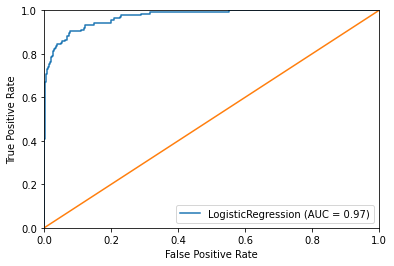

In [20]:
viz = plot_roc_curve(logit_reg, X_valid, Y_valid)
print('Area under the ROC:', viz.roc_auc)   
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])
plt.show();

### Logistic Regression: Explanation-oriented Approach

In [21]:
import statsmodels.api as sm

In [22]:
X = sm.add_constant(X)
Y = df_loans['personal_loan']

logit_sm = sm.Logit(Y, X)
results = logit_sm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.117230
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          personal_loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4987
Method:                           MLE   Df Model:                           12
Date:                Tue, 30 Mar 2021   Pseudo R-squ.:                  0.6293
Time:                        14:27:27   Log-Likelihood:                -586.15
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -12.3105      1.818     -6.773      0.000     -15.873      -8.748
age                                -0.0359      0.067     -0.534      0.593      -0.168       0.096
experience                          0.0450      0.067      0.674      0.500      -0.086       0.176
income                              0.0602      0.003     20.289      0.000       0.054       0.066
family                              0.6182      0.077      8.024      0.000       0.467       0.769
ccavg                               0.1634      0.044      3.708      0.000       0.077       0.250
mortgage                            0.0007      0.001      1.196      0.232      -0.000       0.002
securities_account                 -0.8701      0.301     -2.894      0.004      -1.459      -0.281
cd_account                          3.8389      0.342     11.239      0.000       3.169       4.508
online                             -0.7605      0.166     -4.589      0.000      -1.085      -0.436
creditcard                         -1.0382      0.213     -4.872      0.000      -1.456      -0.621
education_graduate                  3.9654      0.270     14.708      0.000       3.437       4.494
education_advanced/professional     4.0641      0.267     15.225      0.000       3.541       4.587
===================================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### References

- Chapters 8 and 10 - Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python, Galit Shmueli et al. 2019. 
- [Supervised Learning with Scikit-Learn](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning)